In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy import *

In [2]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('bfi.csv')

In [4]:
del df['age']
del df['gender']
del df['education']
del df['Unnamed: 0']
df=df.dropna()

In [5]:
cor = mat(df.corr())
w,v = np.linalg.eig(cor)
nvar=25
tot=np.sum(w)
w=(nvar/tot)*w
cor=np.dot(np.dot(v,np.diag(w)),v.transpose())
fill_diagonal(cor, 1-1/cor.I.diagonal()) 
w,_ = np.linalg.eig(cor)

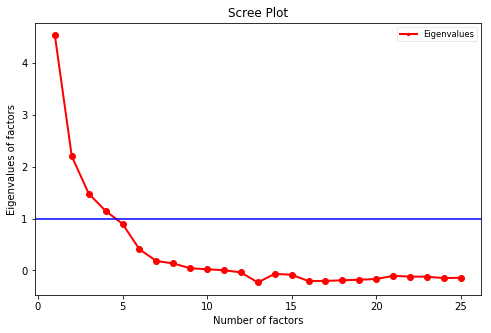

In [6]:
fig = plt.figure(figsize=(8,5))
plt.plot(range(1,len(w)+1), w, 'ro-', linewidth=2)
plt.axhline(y=1, color='b', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of factors')
plt.ylabel('Eigenvalues of factors')
leg = plt.legend(['Eigenvalues'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

In [7]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(df, 4, rotation="varimax")
print(fa.loadings)

     Factor1   Factor2   Factor3   Factor4
A1 -0.226687  0.093998 -0.007377 -0.013420
A2  0.542422  0.030603  0.154972  0.011014
A3  0.640846  0.009598  0.123128  0.013398
A4  0.438320 -0.064614  0.235476 -0.138937
A5  0.645121 -0.121608  0.090791  0.039497
C1  0.085806  0.007177  0.543701  0.215154
C2  0.101918  0.089465  0.651983  0.111184
C3  0.097541 -0.032617  0.560232 -0.011784
C4 -0.076720  0.248365 -0.632005 -0.116322
C5 -0.172626  0.301729 -0.546415  0.013301
E1 -0.499413  0.062931  0.053258 -0.111204
E2 -0.576909  0.263473 -0.073725 -0.108642
E3  0.584843  0.012900  0.062361  0.306781
E4  0.695974 -0.133051  0.078326 -0.033375
E5  0.447418  0.013521  0.280720  0.258260
N1 -0.070888  0.748992 -0.062360 -0.036899
N2 -0.095046  0.734729 -0.040713  0.023141
N3 -0.055609  0.744888 -0.059397 -0.005511
N4 -0.258909  0.601013 -0.152009  0.027601
N5 -0.052317  0.549468 -0.019533 -0.179215
O1  0.202969 -0.006323  0.104372  0.517115
O2  0.064475  0.178084 -0.096007 -0.477556
O3  0.32016

In [8]:
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation="varimax")
print(fa.loadings)

     Factor1   Factor2   Factor3   Factor4   Factor5
A1  0.040465  0.111126  0.022798 -0.077931 -0.428166
A2  0.213716  0.029588  0.139037  0.062139  0.626946
A3  0.317848  0.009357  0.109331  0.056196  0.650743
A4  0.204566 -0.066476  0.230584 -0.112700  0.435624
A5  0.393034 -0.122113  0.087869  0.066708  0.537087
C1  0.070184  0.010416  0.545824  0.209584  0.038878
C2  0.033270  0.089574  0.648731  0.115434  0.102782
C3  0.023907 -0.030855  0.557036 -0.005183  0.111578
C4 -0.064984  0.240410 -0.633806 -0.107535 -0.037498
C5 -0.176395  0.290318 -0.562467  0.036822 -0.047525
E1 -0.574835  0.042819  0.033144 -0.058795 -0.104813
E2 -0.678731  0.244743 -0.102483 -0.042010 -0.112517
E3  0.536816  0.024180  0.083010  0.280877  0.257906
E4  0.646833 -0.115614  0.102023 -0.073422  0.306101
E5  0.504069  0.036145  0.312899  0.213739  0.090354
N1  0.078923  0.786807 -0.045997 -0.084704 -0.216363
N2  0.027301  0.754109 -0.030568 -0.010304 -0.193744
N3 -0.061430  0.731721 -0.067084 -0.004217 -0.